## Lab 2 - Plotting NYC's shelter population, proportions, and adding dataframe columns

Today we will look at our first dataset from [NYC Open Data](https://opendata.cityofnewyork.us) to see how New York's shelter population changes over time.  

### Getting the data

The Department of Homeless Services (DHS) Daily Report dataset contains the number of individuals and families staying in the shelter system each day, starting from August 21, 2013.  

- Go to: [https://data.cityofnewyork.us/Social-Services/DHS-Daily-Report/k46n-sa2m](https://data.cityofnewyork.us/Social-Services/DHS-Daily-Report/k46n-sa2m)
- Click on the "View Data" button.

To keep the data set from being very large (and avoid some missing values in 2014), we will *filter* the data to only be counts from January 1, 2015 to the present. To do this:
- Click on the "Filter" button.
- On the menu that appear, click on "Add a New Filter Condition".
- Choose "Date of Census" but change the "is" to be "is after".
- Click in the box below and a calendar will pop up. Highlight January 1, 2015.
- Click the check box to the left of the data.
- It will take a few seconds (it's a large file) but the rows on the left will be filtered to be all counts after January 1, 2015. 

To download the file,
- Click on the "Export" button.
- Under "Download", choose "CSV".
- The download will begin automatically (files are usually stored in "Downloads" folder).

Upload your CSV file to Jupyter Hub, and open it to see that it has been downloaded correctly.  (You can also do this in Excel or Text Edit before uploading the file.)

### Plotting

First we need to import the matplotlib and pandas packages, and tell Jupyter to display the plots.  The code will be the same as in Lab 1.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Next we need to create a dataframe from the CSV file, and store it in a variable.  We will call our variable `shelter`, but any meaningful name that starts with a letter and consists of only letters, numbers, and the underline character _ will work.

Type `shelter = pd.read_csv("DHS_Daily_Report.csv", parse_dates=["Date of Census"])` below and run your code.

Notice that this command is very similar to the one we used in Lab 1.  We didn't have to include the parameter `skiprows = 5` because the data started on the first row of the file.  However, we need to include the parameter `parse_dates=["Date of Census"]` so that the column `Date of Census` is interpreted as dates.

In [6]:
shelter = pd.read_csv("../../data/DHS_Daily_Report.csv", parse_dates=["Date of Census"])

Check that the data frame was created correctly by displaying it on the screen.

Hint:  type the name of the variable storing the dataframe below

In [7]:
shelter

,Date of Census,Total Adults in Shelter,Total Children in Shelter,Total Individuals in Shelter,Single Adult Men in Shelter,Single Adult Women in Shelter,Total Single Adults in Shelter,Families with Children in Shelter,Adults in Families with Children in Shelter,Children in Families with Children in Shelter,Total Individuals in Families with Children in Shelter,Adult Families in Shelter,Individuals in Adult Families in Shelter
0,2019-08-25,37674,21279,58953,11824,4438,16262,12063,16129,21279,37408,2500,5283
1,2019-08-24,37574,21293,58867,11746,4414,16160,12074,16136,21293,37429,2498,5278
2,2019-08-23,37600,21298,58898,11767,4428,16195,12065,16126,21298,37424,2500,5279
3,2019-08-22,37705,21304,59009,11880,4411,16291,12071,16123,21304,37427,2506,5291
4,2019-08-21,37683,21334,59017,11853,4397,16250,12081,16148,21334,37482,2502,5285


This display is still a bit unwieldy.  To see just the first five rows of `shelter`, type `shelter.head()` below and run the code.

Now we are going to make a line plot (as in Lab 1) of how the total number of individuals in shelter has changed over time.  Therefore, our x values (horizontal axis) will be the "Date of Census" column and the y values will be "Total Individuals in Shelter" column.  

Can you figure out how to make the plot?  If you get stuck, click on Answer below.

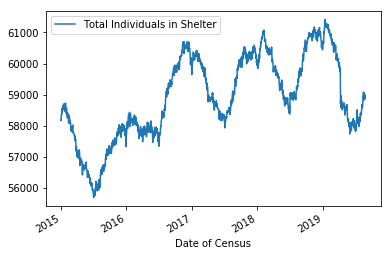

In [8]:
shelter.plot(x = "Date of Census", y = "Total Individuals in Shelter")

<details> <summary>Answer:</summary>
shelter.plot(x="Date of Census", y = "Total Individuals in Shelter")
</details>

What do you notice about this plot?  What do you think causes the large dips?

What happens if you don't include the parameter `y = "Total Individuals in Shelter"` when making the plot?  Try it below.

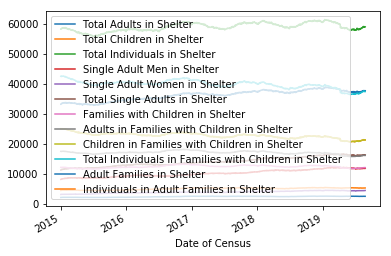

In [9]:
shelter.plot(x = "Date of Census")

When we don't specify which column to use for the y values, the `plot()` function plots all of the columns!  However, right now the legend is covering up almost all of the plot.  We can move the legend outside the plot by adding `.legend(bbox_to_anchor=(1,1))` to the end of our plotting command.  The `.` notation means that we are applying the function on the right of the dot to the result of the code to the left of the dot, which is the plot in this case.

The full command is: `shelter.plot(x="Date of Census").legend(bbox_to_anchor=(1,1))`  Try it below.

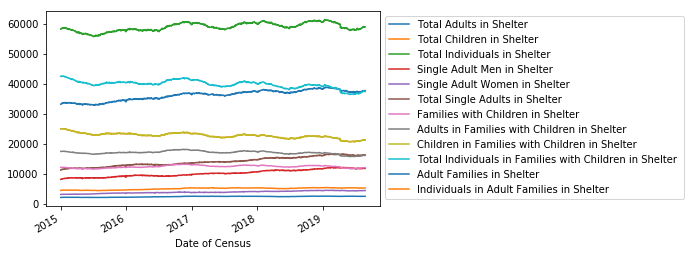

In [10]:
shelter.plot(x="Date of Census").legend(bbox_to_anchor=(1,1))

Look at the line for Total Individuals in Shelter in this plot.  It is much flatter than in our first plot.  Why? 

### Adding new columns to the dataframe

This dataset only contains the numbers of individuals or families using the shelters.  What if we want to know how the proportion of individuals who are adults has changed over time?  For each day:

$\text{proportion of individuals who are adults in shelter} = \frac{\text{# of individuls who are adults in shelter}}{\text{# of individuals (adults or children) in shelter}}$

We can do this computation for all rows in the dataframe in one line of code.  First, type `shelter["Total Adults in Shelter"]` below and run the code.  What does this piece of code refer to?  

In [11]:
shelter["Total Adults in Shelter"]

0       37674
1       37574
2       37600
3       37705
4       37683
5       37676
6       37717
7       37694
8       37517
9       37594
10      37741
11      37719
12      37659
13      37675
14      37542
15      37387
16      37400
17      37477
18      37544
19      37510
20      37434
21      37396
22      37295
23      37313
24      37317
25      37392
26      37350
27      37380
28      37310
29      37178
        ...  
1626    33569
1627    33602
1628    33699
1629    33774
1630    33781
1631    33712
1632    33708
1633    33595
1634    33611
1635    33711
1636    33686
1637    33716
1638    33687
1639    33630
1640    33538
1641    33621
1642    33646
1643    33636
1644    33615
1645    33609
1646    33569
1647    33484
1648    33415
1649    33517
1650    33464
1651    33374
1652    33354
1653    33303
1654    33161
1655    33162
Name: Total Adults in Shelter, Length: 1656, dtype: int64

This code produces (or *returns*) all the data values in the `Total Adults in Shelter` column, which are the numbers we will need for the numerators in our proportion formula.  Recall the numerator is the top part of a fraction and the denominator is the bottom part of a fraction. 

Can you figure out how to get all the data values in the `Total Individuals in Shelter` column for the denominators?

<details> <summary>Answer:</summary>
shelter["Total Individuals in Shelter"]
</details>

Now to get the proportions, the following code will do column-wise division:
`shelter["Total Adults in Shelter"]/shelter["Total Individuals in Shelter"]`

That is, for each row, the value in the `Total Adults in Shelter` column is divided by the value in the `Total Individuals in Shelter` column. 

Try running this code below:

In [12]:
shelter["Total Adults in Shelter"]/shelter["Total Individuals in Shelter"]

0       0.639051
1       0.638286
2       0.638392
3       0.638970
4       0.638511
5       0.638793
6       0.639011
7       0.638135
8       0.637719
9       0.638160
10      0.638790
11      0.639110
12      0.639003
13      0.639123
14      0.638372
15      0.638003
16      0.638400
17      0.639005
18      0.639722
19      0.639491
20      0.639133
21      0.639029
22      0.638679
23      0.639042
24      0.639417
25      0.640252
26      0.640300
27      0.639992
28      0.640086
29      0.639500
          ...   
1626    0.574684
1627    0.574334
1628    0.574931
1629    0.575141
1630    0.575172
1631    0.575270
1632    0.574957
1633    0.574549
1634    0.574105
1635    0.574734
1636    0.574405
1637    0.574241
1638    0.573972
1639    0.573460
1640    0.573103
1641    0.573502
1642    0.573508
1643    0.573602
1644    0.573361
1645    0.573112
1646    0.573016
1647    0.572503
1648    0.571900
1649    0.572441
1650    0.572289
1651    0.571943
1652    0.571433
1653    0.5709

This code gives us all the proportions.  To store the proportions in a new column in the `shelter` dataframe, we can use the following code: 

`shelter["Proportion Adults"] = shelter["Total Adults in Shelter"]/shelter["Total Individuals in Shelter"]`

Try running it below:

In [14]:
shelter["Proportion Adults"] = shelter["Total Adults in Shelter"]/shelter["Total Individuals in Shelter"]

What do you think the new column is called?  Display the new `shelter` dataframe, and see if you were correct.

In [15]:
shelter.head()

,Date of Census,Total Adults in Shelter,Total Children in Shelter,Total Individuals in Shelter,Single Adult Men in Shelter,Single Adult Women in Shelter,Total Single Adults in Shelter,Families with Children in Shelter,Adults in Families with Children in Shelter,Children in Families with Children in Shelter,Total Individuals in Families with Children in Shelter,Adult Families in Shelter,Individuals in Adult Families in Shelter,Proportion Adults
0,2019-08-25,37674,21279,58953,11824,4438,16262,12063,16129,21279,37408,2500,5283,0.639051
1,2019-08-24,37574,21293,58867,11746,4414,16160,12074,16136,21293,37429,2498,5278,0.638286
2,2019-08-23,37600,21298,58898,11767,4428,16195,12065,16126,21298,37424,2500,5279,0.638392
3,2019-08-22,37705,21304,59009,11880,4411,16291,12071,16123,21304,37427,2506,5291,0.638970
4,2019-08-21,37683,21334,59017,11853,4397,16250,12081,16148,21334,37482,2502,5285,0.638511


Let's plot the proportion of adults as the y axis and the date as the x axis.  Can you figure out the code to do this?  As usual the answer is hidden below if you get stuck.

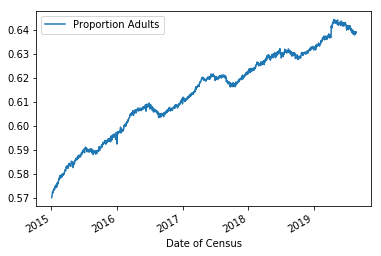

In [16]:
shelter.plot(x = "Date of Census", y = "Proportion Adults")

<details> <summary>Answer:</summary>
shelter.plot(x = "Date of Census", y = "Proportion Adults")
</details>

How is the proportion of adults in the shelters changing over time?

#### Challenges
- How has the proportion of children in shelter changed over time?
- How has the proportion of adults who are single men changed over time? 
- Choose another proportion that interests you, and plot how it has changed over time.